In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
#importing other required libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
from datetime import datetime, timedelta,date

In [3]:
# load data
items=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/items.csv")
shops=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/shops.csv")
cats=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv")
train=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv")
test=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")

In [4]:
# supplemental information about the items/products
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [6]:
#supplemental information about the shops
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
#supplemental information about the items categories.
cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [10]:
#the training set. Daily historical data from January 2013 to October 2015.
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [12]:
#the test set. You need to forecast the sales for these shops and products for November 2015
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


ID - an Id that represents a (Shop, Item) tuple within the test set

item_name, shop_name, item_category_name are in Russian

# DATA CLEANING

<AxesSubplot:xlabel='item_price'>

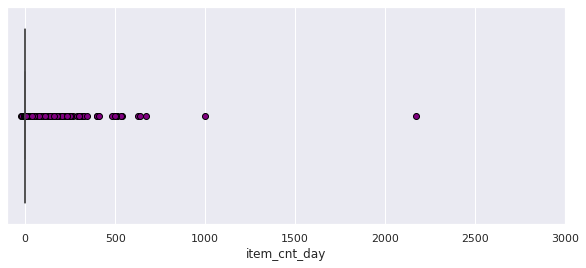

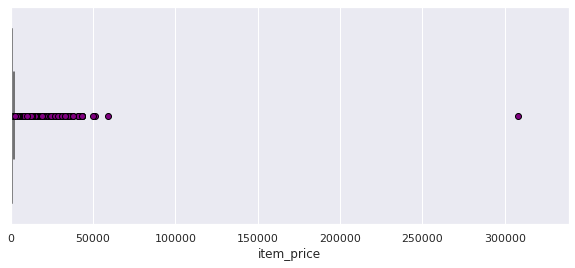

In [14]:
# Check for Outliers
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
sns.boxplot(x=train.item_cnt_day, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price, flierprops=flierprops)

In [15]:
# Fixing a threshold based on above figures- 
# eliminate item_cnt_day more than 1000 in one day
# eliminate item_price more than 100000
train = train[(train.item_price < 100000 )& (train.item_cnt_day < 1000)]
# also removing all the negative item prices
train = train[(train.item_price > 0) & (train.item_cnt_day > 0)].reset_index(drop = True)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,06.01.2013,0,25,2554,1709.05,1.0
3,15.01.2013,0,25,2555,1099.00,1.0
4,10.01.2013,0,25,2564,349.00,1.0


In [16]:
train.shape

(2928489, 6)

It is seen that 7360 rows have been removed

In [18]:
train['date'] = pd.to_datetime(train['date'])

In [19]:
#represent month in date field as its first day
train['date'] = train['date'].dt.year.astype('str') + '-' + train['date'].dt.month.astype('str') + '-01'
train['date'] = pd.to_datetime(train['date'])
#groupby date and sum the sales
train = train.groupby('date').item_cnt_day.sum().reset_index()

In [20]:
train.head()

,date,item_cnt_day
0,2013-01-01,117233.0
1,2013-02-01,133938.0
2,2013-03-01,140869.0
3,2013-04-01,112445.0
4,2013-05-01,117023.0


In [21]:
# rename item_cnt_day as item_cnt_month
train.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)

In [22]:
train.head()

,date,item_cnt_month
0,2013-01-01,117233.0
1,2013-02-01,133938.0
2,2013-03-01,140869.0
3,2013-04-01,112445.0
4,2013-05-01,117023.0


In [23]:
# plot the monthly sales
df_sales_copy= train.copy()

In [24]:
df_sales_copy.head()

,date,item_cnt_month
0,2013-01-01,117233.0
1,2013-02-01,133938.0
2,2013-03-01,140869.0
3,2013-04-01,112445.0
4,2013-05-01,117023.0


In [25]:
df_sales_copy=df_sales_copy.set_index('date')

In [ ]:
df_sales_copy.head()

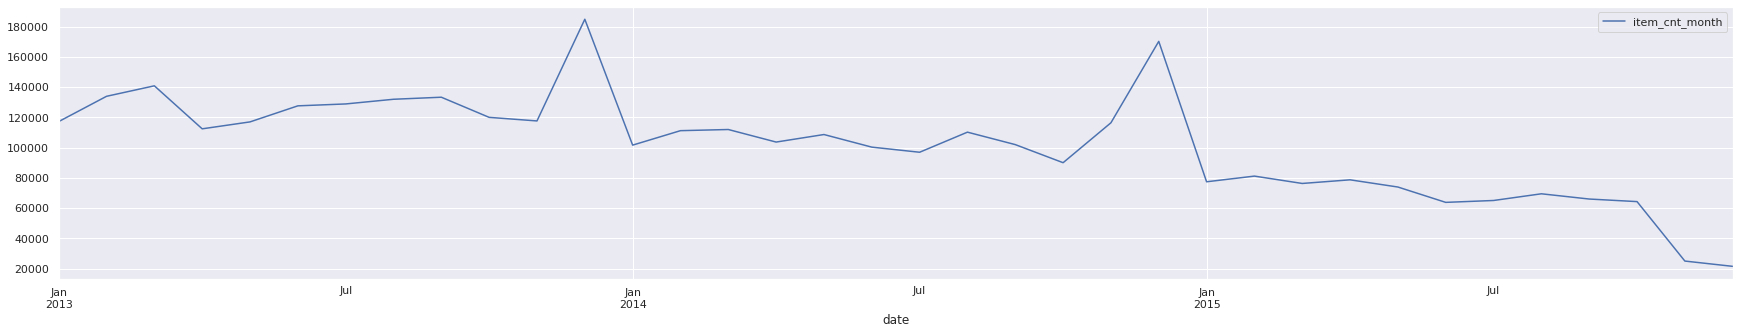

In [26]:
df_sales_copy.plot(kind="line",y=["item_cnt_month"],figsize=[30,5])
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [28]:
adf_test(train['item_cnt_month'])

ADF Statistics: -0.14315691113096754
p- value: 0.944966644631922
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [29]:
#create a new dataframe to model the difference
df_diff = train.copy()
#add previous sales to the next row
df_diff['prev_item_cnt_month'] = df_diff['item_cnt_month'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['item_cnt_month'] - df_diff['prev_item_cnt_month'])
df_diff.head(10)

,date,item_cnt_month,prev_item_cnt_month,diff
1,2013-02-01,133938.0,117233.0,16705.0
2,2013-03-01,140869.0,133938.0,6931.0
3,2013-04-01,112445.0,140869.0,-28424.0
4,2013-05-01,117023.0,112445.0,4578.0
5,2013-06-01,127632.0,117023.0,10609.0
6,2013-07-01,128890.0,127632.0,1258.0
7,2013-08-01,131980.0,128890.0,3090.0
8,2013-09-01,133337.0,131980.0,1357.0
9,2013-10-01,120024.0,133337.0,-13313.0
10,2013-11-01,117659.0,120024.0,-2365.0


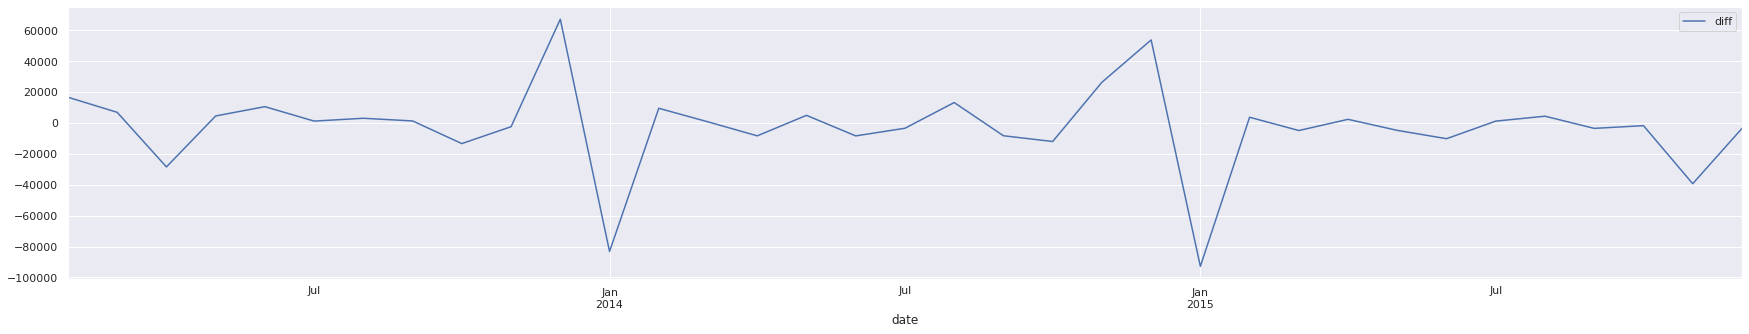

In [30]:
df_diff_copy=df_diff.copy()
df_diff_copy=df_diff_copy.set_index('date')
df_diff_copy.plot(kind="line",y=["diff"],figsize=[30,5])
plt.show()

In [31]:
adf_test(df_diff['diff'])

ADF Statistics: -7.0032446526516114
p- value: 7.230773458442652e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [49]:
#create dataframe for transformation from time series to supervised
df_supervised = df_diff.drop(['prev_item_cnt_month'],axis=1)
#adding lags
for inc in range(1,10):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)
df_supervised.head()

,date,item_cnt_month,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9
0,2013-11-01,117659.0,-2365.0,-13313.0,1357.0,3090.0,1258.0,10609.0,4578.0,-28424.0,6931.0,16705.0
1,2013-12-01,184865.0,67206.0,-2365.0,-13313.0,1357.0,3090.0,1258.0,10609.0,4578.0,-28424.0,6931.0
2,2014-01-01,101672.0,-83193.0,67206.0,-2365.0,-13313.0,1357.0,3090.0,1258.0,10609.0,4578.0,-28424.0
3,2014-02-01,111229.0,9557.0,-83193.0,67206.0,-2365.0,-13313.0,1357.0,3090.0,1258.0,10609.0,4578.0
4,2014-03-01,111992.0,763.0,9557.0,-83193.0,67206.0,-2365.0,-13313.0,1357.0,3090.0,1258.0,10609.0


In [55]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1+lag_2+lag_3', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.24522238803277563


In [56]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['item_cnt_month','date'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

In [57]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [58]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [60]:
#import Keras
import keras
import tensorflow
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [61]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100,batch_size=1, verbose=1, shuffle=False)

2022-06-20 06:29:22.309391: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 06:29:22.459271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 06:29:22.460414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 06:29:22.462695: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/100


2022-06-20 06:29:28.403772: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20/20 [==============================] - 4s 3ms/step - loss: 0.1930
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1904
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1875
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1853
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1835
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1819
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1805
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1792
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1779
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1766
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1753
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1740
Epoch 13/100
20/20 [=============================

In [62]:
y_pred = model.predict(X_test,batch_size=1)
#for multistep prediction, you need to replace X_test values with the predictions coming from t-1

In [63]:
y_pred,y_test

(array([[ 0.07676826],
        [ 0.3199085 ],
        [ 0.26629224],
        [-0.11941909],
        [ 0.2023679 ],
        [ 0.40919188]], dtype=float32),
 array([[ 0.17555668],
        [ 0.21527895],
        [ 0.11671073],
        [ 0.13872171],
        [-0.33119598],
        [ 0.11633575]]))

In [64]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print (np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[ 0.07676826  0.03320397  0.10048684  0.18999319  0.09924943  0.20685453
  -1.12782     0.82184722  0.45715065 -0.05275966]]
[[ 0.3199085   0.17555668  0.03320397  0.10048684  0.18999319  0.09924943
   0.1561646  -1.12782     0.82184722  0.45715065]]
[[ 0.26629224  0.21527895  0.17555668  0.03320397  0.10048684  0.18999319
   0.04168246  0.1561646  -1.12782     0.82184722]]
[[-0.11941909  0.11671073  0.21527895  0.17555668  0.03320397  0.10048684
   0.13822565  0.04168246  0.1561646  -1.12782   ]]
[[0.2023679  0.13872171 0.11671073 0.21527895 0.17555668 0.03320397
  0.04299896 0.13822565 0.04168246 0.1561646 ]]
[[ 0.40919188 -0.33119598  0.13872171  0.11671073  0.21527895  0.17555668
  -0.02858397  0.04299896  0.13822565  0.04168246]]


In [65]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(train[-10:].date)
act_sales = list(train[-10:].item_cnt_month)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

In [66]:
df_result

,pred_value,date
0,69678,2015-04-01
1,91531,2015-05-01
2,82482,2015-06-01
3,41480,2015-07-01
4,68471,2015-08-01
5,89442,2015-09-01


In [67]:
df_result_copy= df_result.copy()
df_result_copy=df_result_copy.set_index('date')

In [68]:
df_result_copy.head()

,pred_value
date,
2015-04-01,69678
2015-05-01,91531
2015-06-01,82482
2015-07-01,41480
2015-08-01,68471


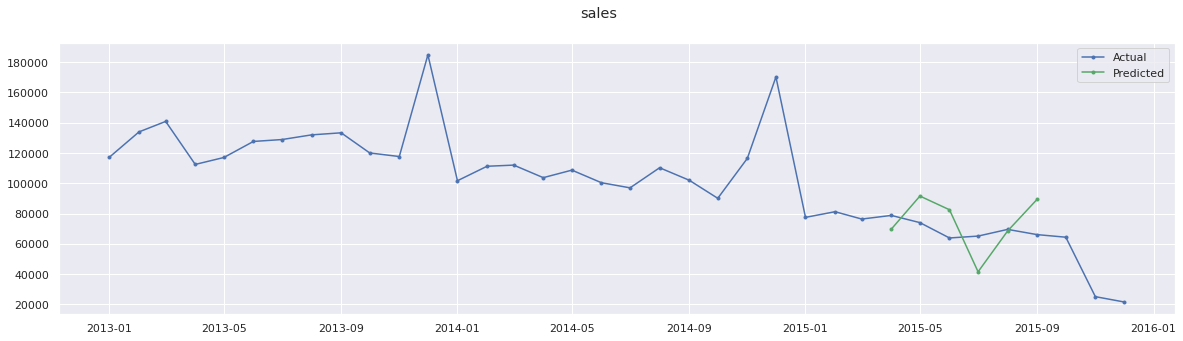

In [69]:
fig = plt.figure(figsize=[20,5])
fig.suptitle('sales')
Actual, = plt.plot(df_sales_copy.index, df_sales_copy, 'b.-', label='Actual')
predicted, = plt.plot(df_result_copy.index, df_result_copy, 'g.-', label='Predicted')
plt.legend(handles=[Actual,predicted])
plt.show()